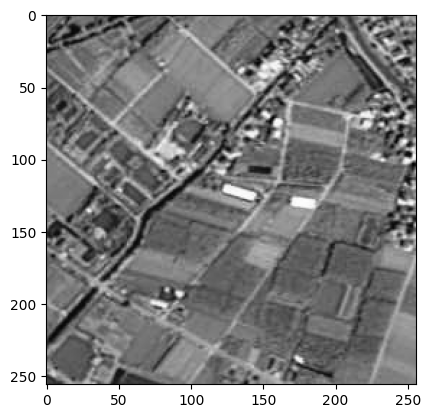

In [1]:
import time

import torch
from dataTreat.readData import LzgdDataset,img_transforms
import numpy as np
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
import os,cv2
import numpy as np
import visualization.visualizationTool as visTool


train_img_dir='../data/trainImg'
train_label_dir='../data/trainLabel1'

trainDataset = LzgdDataset(train_img_dir,train_label_dir,img_transforms)
trainDataloader = DataLoader(trainDataset, batch_size=1, shuffle=True, num_workers=0, pin_memory=True)
type(trainDataset),len(trainDataset)

valid_img_dir='../data/validImg'
valid_label_dir='../data/validLabel1'

validDataset = LzgdDataset(valid_img_dir,valid_label_dir,img_transforms)
validDataloader = DataLoader(validDataset, batch_size=1, shuffle=True, num_workers=0, pin_memory=True)

# for step,(img,label) in enumerate(validDataloader):
#     print(label.shape)
#     print(os.path.basename(validDataloader.dataset.data_list[step]))

visTool.showImageByElementOfDataset(trainDataset[1])

In [3]:
# tensorboard --logdir=lzgd
from torch.utils.tensorboard import SummaryWriter

writer=SummaryWriter('lzgd')
step=0
for data in trainDataloader:
    img,label=data
    # print( torch.unique(label,return_counts=True))
    writer.add_images('img',img,step)
    writer.add_images('label',label,step)


    # imghouse=model(img)
    # print(imghouse.shape)
    # imghouse=torch.reshape(imghouse,(-1,1,248,248))
    # writer.add_images(str(label)+'_nn',imghouse,step,dataformats='NCHW')
    step=step+1

writer.close()
print(torch.cuda.is_available())

True


In [6]:
from module.module import Module
from module.lzgdModule import Lzgd
from module.FCNModule import FCN
from module.unet import UNet
from module.unetplusplusModule import NestedUNet
from torch import nn,optim
import torch.nn.functional as F
import time,os,copy
import pandas as pd
from loss.dice import BCE_DICE_Loss
from trainCode.train import train_model,train_1,train_2



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=NestedUNet(num_classes=3).cuda()
# model=UNet(n_channels=3,n_classes=3).cuda()

# 定义损失函数和优化器
LR = 1e-5
criterion = BCE_DICE_Loss().cuda()

model_fcn=Module(model=FCN(num_classes=3).cuda(),criterion=criterion,LR=LR,flag='fcn')
model_unet=Module(model=UNet(n_channels=3,n_classes=3).cuda(),criterion=criterion,LR=LR,flag='unet')
model_unetplusplus=Module(model=NestedUNet(num_classes=3).cuda(),criterion=criterion,LR=LR,flag='unet++')


models=[model_fcn,model_unet,model_unetplusplus]

# 对模型进行迭代训练，对所有的数据训练epoch轮
# model,train_process = \
## 保存训练好的模型
# torch.save(model,"lzgd.pth")
# torch.save(model.state_dict(), "lzgd.pt")
# train_process
for model in models:
    print(f'--------------------开始训练{model.flag}模型！！！！------------------')
    train_2(model,trainDataloader,validDataloader,device, num_epochs=50)

C:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------开始训练fcn模型！！！！------------------
-------------------现在开始第1轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.85it/s, loss=0.828]


Got 22535979/39321600 with acc 57.31
Dice score: 0.013533337041735649
-------------------现在开始第2轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 42.17it/s, loss=0.808]


Got 24915674/39321600 with acc 63.36
Dice score: 0.013688938692212105
-------------------现在开始第3轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 41.15it/s, loss=0.767]


Got 26756285/39321600 with acc 68.04
Dice score: 0.01462755911052227
-------------------现在开始第4轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.85it/s, loss=0.733]


Got 28557529/39321600 with acc 72.63
Dice score: 0.018182147294282913
-------------------现在开始第5轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.57it/s, loss=0.687]


Got 30228451/39321600 with acc 76.87
Dice score: 0.027961237356066704
-------------------现在开始第6轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.80it/s, loss=0.655]


Got 32548222/39321600 with acc 82.77
Dice score: 0.0384715311229229
-------------------现在开始第7轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.98it/s, loss=0.613]


Got 34391598/39321600 with acc 87.46
Dice score: 0.05501338467001915
-------------------现在开始第8轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.22it/s, loss=0.54] 


Got 35825024/39321600 with acc 91.11
Dice score: 0.07112777978181839
-------------------现在开始第9轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.27it/s, loss=0.476]


Got 36973174/39321600 with acc 94.03
Dice score: 0.11602723598480225
-------------------现在开始第10轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.74it/s, loss=0.381]


Got 38119328/39321600 with acc 96.94
Dice score: 0.21851131319999695
-------------------现在开始第11轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.64it/s, loss=0.393]


Got 38618165/39321600 with acc 98.21
Dice score: 0.41841498017311096
-------------------现在开始第12轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.36it/s, loss=0.261]


Got 38488464/39321600 with acc 97.88
Dice score: 0.4186934232711792
-------------------现在开始第13轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.59it/s, loss=0.232]


Got 38631809/39321600 with acc 98.25
Dice score: 0.4394912123680115
-------------------现在开始第14轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.37it/s, loss=0.296]


Got 38797097/39321600 with acc 98.67
Dice score: 0.44985392689704895
-------------------现在开始第15轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.40it/s, loss=0.194]


Got 38797599/39321600 with acc 98.67
Dice score: 0.4584685266017914
-------------------现在开始第16轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.44it/s, loss=0.228]


Got 38652993/39321600 with acc 98.30
Dice score: 0.4576900899410248
-------------------现在开始第17轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.34it/s, loss=0.592]


Got 38763791/39321600 with acc 98.58
Dice score: 0.4673316776752472
-------------------现在开始第18轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.31it/s, loss=0.241]


Got 38753114/39321600 with acc 98.55
Dice score: 0.4744807183742523
-------------------现在开始第19轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.46it/s, loss=0.291]


Got 38791397/39321600 with acc 98.65
Dice score: 0.4802543520927429
-------------------现在开始第20轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.32it/s, loss=0.192]


Got 38827964/39321600 with acc 98.74
Dice score: 0.46620315313339233
-------------------现在开始第21轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.25it/s, loss=0.307]


Got 38758657/39321600 with acc 98.57
Dice score: 0.48136550188064575
-------------------现在开始第22轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.25it/s, loss=0.275]


Got 38804159/39321600 with acc 98.68
Dice score: 0.485549658536911
-------------------现在开始第23轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.36it/s, loss=0.183] 


Got 38793366/39321600 with acc 98.66
Dice score: 0.4899538457393646
-------------------现在开始第24轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.37it/s, loss=0.21] 


Got 38801320/39321600 with acc 98.68
Dice score: 0.487179696559906
-------------------现在开始第25轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.25it/s, loss=0.191] 


Got 38835998/39321600 with acc 98.77
Dice score: 0.4570475220680237
-------------------现在开始第26轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.10it/s, loss=0.32]  


Got 38796313/39321600 with acc 98.66
Dice score: 0.4954838156700134
-------------------现在开始第27轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.25it/s, loss=0.189] 


Got 38746006/39321600 with acc 98.54
Dice score: 0.4906013309955597
-------------------现在开始第28轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.28it/s, loss=0.223] 


Got 38806991/39321600 with acc 98.69
Dice score: 0.4969598650932312
-------------------现在开始第29轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.60it/s, loss=0.187] 


Got 38709061/39321600 with acc 98.44
Dice score: 0.48502957820892334
-------------------现在开始第30轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.30it/s, loss=0.243] 


Got 38783954/39321600 with acc 98.63
Dice score: 0.4935981333255768
-------------------现在开始第31轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.25it/s, loss=0.209] 


Got 38829657/39321600 with acc 98.75
Dice score: 0.4822821617126465
-------------------现在开始第32轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.29it/s, loss=0.393] 


Got 38785146/39321600 with acc 98.64
Dice score: 0.4979396462440491
-------------------现在开始第33轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 40.00it/s, loss=0.525] 


Got 38804164/39321600 with acc 98.68
Dice score: 0.4966195821762085
-------------------现在开始第34轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.17it/s, loss=0.128] 


Got 38789543/39321600 with acc 98.65
Dice score: 0.4965580999851227
-------------------现在开始第35轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.74it/s, loss=0.229] 


Got 38813597/39321600 with acc 98.71
Dice score: 0.4910821318626404
-------------------现在开始第36轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.65it/s, loss=0.157] 


Got 38788890/39321600 with acc 98.65
Dice score: 0.4985492527484894
-------------------现在开始第37轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.71it/s, loss=0.133] 


Got 38827342/39321600 with acc 98.74
Dice score: 0.4765486419200897
-------------------现在开始第38轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.31it/s, loss=0.174] 


Got 38784317/39321600 with acc 98.63
Dice score: 0.4958612024784088
-------------------现在开始第39轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.95it/s, loss=0.246] 


Got 38805120/39321600 with acc 98.69
Dice score: 0.4917939603328705
-------------------现在开始第40轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.02it/s, loss=0.159] 


Got 38821641/39321600 with acc 98.73
Dice score: 0.48823919892311096
-------------------现在开始第41轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.74it/s, loss=0.298] 


Got 38815593/39321600 with acc 98.71
Dice score: 0.48253390192985535
-------------------现在开始第42轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.37it/s, loss=0.267] 


Got 38790907/39321600 with acc 98.65
Dice score: 0.49012792110443115
-------------------现在开始第43轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.14it/s, loss=0.569] 


Got 38815049/39321600 with acc 98.71
Dice score: 0.4842522442340851
-------------------现在开始第44轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.22it/s, loss=0.221] 


Got 38803661/39321600 with acc 98.68
Dice score: 0.49381712079048157
-------------------现在开始第45轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.32it/s, loss=0.233] 


Got 38777046/39321600 with acc 98.62
Dice score: 0.49182960391044617
-------------------现在开始第46轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.31it/s, loss=0.171] 


Got 38811312/39321600 with acc 98.70
Dice score: 0.46916213631629944
-------------------现在开始第47轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.43it/s, loss=0.13]  


Got 38834734/39321600 with acc 98.76
Dice score: 0.44425705075263977
-------------------现在开始第48轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.37it/s, loss=0.14]  


Got 38826026/39321600 with acc 98.74
Dice score: 0.4630551040172577
-------------------现在开始第49轮训练-------------------


100%|██████████| 360/360 [00:08<00:00, 40.33it/s, loss=0.267] 


Got 38769834/39321600 with acc 98.60
Dice score: 0.48845624923706055
-------------------现在开始第50轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.04it/s, loss=0.209] 


Got 38828441/39321600 with acc 98.75
Dice score: 0.4900161921977997
--------------------开始训练unet模型！！！！------------------
-------------------现在开始第1轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.14it/s, loss=0.7]  


Got 37866121/39321600 with acc 96.30
Dice score: 0.28771501779556274
-------------------现在开始第2轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 37.79it/s, loss=0.715]


Got 38589303/39321600 with acc 98.14
Dice score: 0.33109015226364136
-------------------现在开始第3轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 37.90it/s, loss=0.67] 


Got 38412342/39321600 with acc 97.69
Dice score: 0.34005603194236755
-------------------现在开始第4轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.25it/s, loss=0.678]


Got 37630342/39321600 with acc 95.70
Dice score: 0.27851399779319763
-------------------现在开始第5轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.39it/s, loss=0.636]


Got 37679026/39321600 with acc 95.82
Dice score: 0.23026883602142334
-------------------现在开始第6轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.48it/s, loss=0.62] 


Got 38459618/39321600 with acc 97.81
Dice score: 0.25607070326805115
-------------------现在开始第7轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.58it/s, loss=0.605]


Got 38049688/39321600 with acc 96.77
Dice score: 0.24540720880031586
-------------------现在开始第8轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.66it/s, loss=0.595]


Got 37420463/39321600 with acc 95.17
Dice score: 0.24997809529304504
-------------------现在开始第9轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.91it/s, loss=0.507]


Got 38475317/39321600 with acc 97.85
Dice score: 0.22552238404750824
-------------------现在开始第10轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.16it/s, loss=0.609]


Got 38686439/39321600 with acc 98.38
Dice score: 0.27232596278190613
-------------------现在开始第11轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.01it/s, loss=0.609]


Got 38652403/39321600 with acc 98.30
Dice score: 0.23349489271640778
-------------------现在开始第12轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.14it/s, loss=0.501]


Got 38756133/39321600 with acc 98.56
Dice score: 0.23988932371139526
-------------------现在开始第13轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 37.43it/s, loss=0.485]


Got 38524333/39321600 with acc 97.97
Dice score: 0.22752606868743896
-------------------现在开始第14轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.04it/s, loss=0.572]


Got 38702807/39321600 with acc 98.43
Dice score: 0.2706197202205658
-------------------现在开始第15轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.55it/s, loss=0.523]


Got 38272898/39321600 with acc 97.33
Dice score: 0.3210885524749756
-------------------现在开始第16轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.96it/s, loss=0.544]


Got 38710136/39321600 with acc 98.44
Dice score: 0.17798921465873718
-------------------现在开始第17轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.00it/s, loss=0.481]


Got 37912457/39321600 with acc 96.42
Dice score: 0.26447078585624695
-------------------现在开始第18轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 37.88it/s, loss=0.517]


Got 37859531/39321600 with acc 96.28
Dice score: 0.3085833787918091
-------------------现在开始第19轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 37.82it/s, loss=0.317]


Got 38675032/39321600 with acc 98.36
Dice score: 0.20858338475227356
-------------------现在开始第20轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.66it/s, loss=0.533]


Got 38104998/39321600 with acc 96.91
Dice score: 0.2648526430130005
-------------------现在开始第21轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 37.87it/s, loss=0.458]


Got 38551639/39321600 with acc 98.04
Dice score: 0.2119719237089157
-------------------现在开始第22轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.33it/s, loss=0.471]


Got 38725024/39321600 with acc 98.48
Dice score: 0.17595914006233215
-------------------现在开始第23轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.54it/s, loss=0.389]


Got 38619242/39321600 with acc 98.21
Dice score: 0.29596585035324097
-------------------现在开始第24轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.88it/s, loss=0.481]


Got 38683642/39321600 with acc 98.38
Dice score: 0.17606954276561737
-------------------现在开始第25轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.69it/s, loss=0.219]


Got 38591841/39321600 with acc 98.14
Dice score: 0.24267634749412537
-------------------现在开始第26轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.88it/s, loss=0.434]


Got 38470175/39321600 with acc 97.83
Dice score: 0.22579367458820343
-------------------现在开始第27轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.95it/s, loss=0.358]


Got 38690759/39321600 with acc 98.40
Dice score: 0.26932042837142944
-------------------现在开始第28轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.41it/s, loss=0.351]


Got 38842155/39321600 with acc 98.78
Dice score: 0.026645861566066742
-------------------现在开始第29轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.36it/s, loss=0.159]


Got 38833504/39321600 with acc 98.76
Dice score: 0.1625797301530838
-------------------现在开始第30轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.29it/s, loss=0.454]


Got 38229137/39321600 with acc 97.22
Dice score: 0.30136263370513916
-------------------现在开始第31轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.31it/s, loss=0.282]


Got 38583983/39321600 with acc 98.12
Dice score: 0.19217900931835175
-------------------现在开始第32轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.34it/s, loss=0.354]


Got 38379706/39321600 with acc 97.60
Dice score: 0.3061434030532837
-------------------现在开始第33轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.25it/s, loss=0.111]


Got 38781747/39321600 with acc 98.63
Dice score: 0.22666454315185547
-------------------现在开始第34轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.30it/s, loss=0.452]


Got 38649036/39321600 with acc 98.29
Dice score: 0.2462250143289566
-------------------现在开始第35轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.32it/s, loss=0.36]  


Got 38776804/39321600 with acc 98.61
Dice score: 0.21651360392570496
-------------------现在开始第36轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.33it/s, loss=0.403] 


Got 38631058/39321600 with acc 98.24
Dice score: 0.2982847988605499
-------------------现在开始第37轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.18it/s, loss=0.0795]


Got 38778326/39321600 with acc 98.62
Dice score: 0.1280752420425415
-------------------现在开始第38轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.33it/s, loss=0.323] 


Got 38645150/39321600 with acc 98.28
Dice score: 0.21753814816474915
-------------------现在开始第39轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.71it/s, loss=0.159] 


Got 38643942/39321600 with acc 98.28
Dice score: 0.19947221875190735
-------------------现在开始第40轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 39.27it/s, loss=0.234] 


Got 38664580/39321600 with acc 98.33
Dice score: 0.18805688619613647
-------------------现在开始第41轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.45it/s, loss=0.322] 


Got 38832090/39321600 with acc 98.76
Dice score: 0.07437890022993088
-------------------现在开始第42轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 36.92it/s, loss=0.2]   


Got 38809145/39321600 with acc 98.70
Dice score: 0.11443591862916946
-------------------现在开始第43轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.24it/s, loss=0.36]  


Got 38653209/39321600 with acc 98.30
Dice score: 0.17702092230319977
-------------------现在开始第44轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.59it/s, loss=0.175] 


Got 38788085/39321600 with acc 98.64
Dice score: 0.15361285209655762
-------------------现在开始第45轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 38.28it/s, loss=0.159] 


Got 38823856/39321600 with acc 98.73
Dice score: 0.15269364416599274
-------------------现在开始第46轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 37.53it/s, loss=0.0312]


Got 38806619/39321600 with acc 98.69
Dice score: 0.14003561437129974
-------------------现在开始第47轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 37.54it/s, loss=0.0521]


Got 38728049/39321600 with acc 98.49
Dice score: 0.2585940659046173
-------------------现在开始第48轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 37.67it/s, loss=0.134] 


Got 38764368/39321600 with acc 98.58
Dice score: 0.30180612206459045
-------------------现在开始第49轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 37.60it/s, loss=0.22]  


Got 38781515/39321600 with acc 98.63
Dice score: 0.22963818907737732
-------------------现在开始第50轮训练-------------------


100%|██████████| 360/360 [00:09<00:00, 36.94it/s, loss=0.111] 


Got 38770265/39321600 with acc 98.60
Dice score: 0.2338581532239914
--------------------开始训练unet++模型！！！！------------------
-------------------现在开始第1轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 29.03it/s, loss=0.77] 


Got 36095518/39321600 with acc 91.80
Dice score: 0.1518528014421463
-------------------现在开始第2轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.57it/s, loss=0.763]


Got 37796343/39321600 with acc 96.12
Dice score: 0.229460671544075
-------------------现在开始第3轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.62it/s, loss=0.734]


Got 38095159/39321600 with acc 96.88
Dice score: 0.19191694259643555
-------------------现在开始第4轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.91it/s, loss=0.723]


Got 37909789/39321600 with acc 96.41
Dice score: 0.24437375366687775
-------------------现在开始第5轮训练-------------------


100%|██████████| 360/360 [00:13<00:00, 27.66it/s, loss=0.756]


Got 35253453/39321600 with acc 89.65
Dice score: 0.26258590817451477
-------------------现在开始第6轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 27.90it/s, loss=0.749]


Got 38317164/39321600 with acc 97.45
Dice score: 0.3058880567550659
-------------------现在开始第7轮训练-------------------


100%|██████████| 360/360 [00:13<00:00, 27.69it/s, loss=0.712]


Got 38667804/39321600 with acc 98.34
Dice score: 0.2680727541446686
-------------------现在开始第8轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.08it/s, loss=0.63] 


Got 38390986/39321600 with acc 97.63
Dice score: 0.2441737949848175
-------------------现在开始第9轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.00it/s, loss=0.728]


Got 38295602/39321600 with acc 97.39
Dice score: 0.3267272412776947
-------------------现在开始第10轮训练-------------------


100%|██████████| 360/360 [00:13<00:00, 27.49it/s, loss=0.669]


Got 36440664/39321600 with acc 92.67
Dice score: 0.26427361369132996
-------------------现在开始第11轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 27.77it/s, loss=0.694]


Got 38435418/39321600 with acc 97.75
Dice score: 0.27919480204582214
-------------------现在开始第12轮训练-------------------


100%|██████████| 360/360 [00:13<00:00, 27.40it/s, loss=0.676]


Got 38684142/39321600 with acc 98.38
Dice score: 0.22273503243923187
-------------------现在开始第13轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 27.90it/s, loss=0.668]


Got 38780259/39321600 with acc 98.62
Dice score: 0.1832863837480545
-------------------现在开始第14轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.15it/s, loss=0.642]


Got 38059569/39321600 with acc 96.79
Dice score: 0.30690380930900574
-------------------现在开始第15轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 29.00it/s, loss=0.661]


Got 38599687/39321600 with acc 98.16
Dice score: 0.23047727346420288
-------------------现在开始第16轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 29.09it/s, loss=0.663]


Got 38680791/39321600 with acc 98.37
Dice score: 0.24199607968330383
-------------------现在开始第17轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 29.13it/s, loss=0.613]


Got 37878162/39321600 with acc 96.33
Dice score: 0.32203754782676697
-------------------现在开始第18轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 29.10it/s, loss=0.649]


Got 38008107/39321600 with acc 96.66
Dice score: 0.2909088134765625
-------------------现在开始第19轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.67it/s, loss=0.623]


Got 38277164/39321600 with acc 97.34
Dice score: 0.2511451244354248
-------------------现在开始第20轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.57it/s, loss=0.64] 


Got 38755182/39321600 with acc 98.56
Dice score: 0.22294577956199646
-------------------现在开始第21轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.99it/s, loss=0.589]


Got 38606259/39321600 with acc 98.18
Dice score: 0.20915405452251434
-------------------现在开始第22轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.96it/s, loss=0.614]


Got 38516757/39321600 with acc 97.95
Dice score: 0.2420268952846527
-------------------现在开始第23轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.77it/s, loss=0.572]


Got 38254942/39321600 with acc 97.29
Dice score: 0.2438686639070511
-------------------现在开始第24轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.93it/s, loss=0.609]


Got 38268897/39321600 with acc 97.32
Dice score: 0.26243725419044495
-------------------现在开始第25轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.31it/s, loss=0.601]


Got 38508488/39321600 with acc 97.93
Dice score: 0.24179919064044952
-------------------现在开始第26轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.69it/s, loss=0.587]


Got 38491673/39321600 with acc 97.89
Dice score: 0.25887370109558105
-------------------现在开始第27轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.67it/s, loss=0.456]


Got 38580561/39321600 with acc 98.12
Dice score: 0.21878650784492493
-------------------现在开始第28轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.83it/s, loss=0.544]


Got 38124228/39321600 with acc 96.95
Dice score: 0.24376407265663147
-------------------现在开始第29轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.10it/s, loss=0.56] 


Got 38187758/39321600 with acc 97.12
Dice score: 0.29663994908332825
-------------------现在开始第30轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.24it/s, loss=0.594]


Got 38733691/39321600 with acc 98.50
Dice score: 0.22283269464969635
-------------------现在开始第31轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 27.99it/s, loss=0.555]


Got 38146267/39321600 with acc 97.01
Dice score: 0.26842743158340454
-------------------现在开始第32轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.46it/s, loss=0.581]


Got 38476544/39321600 with acc 97.85
Dice score: 0.24859905242919922
-------------------现在开始第33轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.08it/s, loss=0.57] 


Got 38793309/39321600 with acc 98.66
Dice score: 0.20149604976177216
-------------------现在开始第34轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.65it/s, loss=0.557]


Got 38791670/39321600 with acc 98.65
Dice score: 0.13998274505138397
-------------------现在开始第35轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.65it/s, loss=0.54] 


Got 38572258/39321600 with acc 98.09
Dice score: 0.22590157389640808
-------------------现在开始第36轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.08it/s, loss=0.442]


Got 38687203/39321600 with acc 98.39
Dice score: 0.24058431386947632
-------------------现在开始第37轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.84it/s, loss=0.557]


Got 38693435/39321600 with acc 98.40
Dice score: 0.2245859056711197
-------------------现在开始第38轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 29.03it/s, loss=0.524]


Got 38764628/39321600 with acc 98.58
Dice score: 0.2421644926071167
-------------------现在开始第39轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 29.04it/s, loss=0.537]


Got 37817121/39321600 with acc 96.17
Dice score: 0.3060491383075714
-------------------现在开始第40轮训练-------------------


100%|██████████| 360/360 [00:12<00:00, 28.07it/s, loss=0.496]


Got 38402636/39321600 with acc 97.66
Dice score: 0.2403065413236618
-------------------现在开始第41轮训练-------------------


 95%|█████████▌| 342/360 [00:12<00:00, 28.77it/s, loss=0.463]

In [5]:

import cv2
import torch,torchvision
from module.unetplusplusModule import NestedUNet
from module.lzgdModule import Lzgd
from dataTreat.readData import LzgdTestDataset,LzgdDataset,img_transforms
from torch.utils.data import Dataset,DataLoader

#test_img_dir='data/testImg/randomColor144162122040011DDOM.jpg'
# test_img_dir='data/trainImg/randomColor04401152210001DDOM.jpg'
# test_label_dir='data/testLabel'
#
# testDataset = LzgdDataset(test_img_dir,test_label_dir,img_transforms)
# testDataloader = DataLoader(testDataset, batch_size=10, shuffle=True, num_workers=0, pin_memory=True)
testpath='../data/testImg'
outpath='pred'


# model=NestedUNet(n_channels=3,n_classes=3).cuda()
model=NestedUNet(num_classes=3).cuda()
model_path='lzgd.pth'
model.load_state_dict(torch.load(model_path))
model.eval()

device = torch.device('cuda')

def prediect(model,data_path,device):

    for name in os.listdir(data_path):
        input=cv2.imread(os.path.join(data_path,name))
        data_tfs = transforms.Compose([
            transforms.ToTensor(),
        ])
        input = data_tfs(input)
        input = input.unsqueeze(0)
        input = input.to(device)

        print(input.shape)
        with torch.no_grad():
            preds = torch.sigmoid(model(input))
            preds = (preds > 0.5).float()

        torchvision.utils.save_image(

            preds, f"{outpath}/{name}"
        )




prediect(model,testpath,device)



torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1,

In [ ]:
class ResBlock_CBAM(nn.Module):
    def __init__(self, in_places, places, stride=1, downsampling=False, expansion=1):
        super(ResBlock_CBAM, self).__init__()
        self.expansion = expansion
        self.downsampling = downsampling

        self.bottleneck = nn.Sequential(
            nn.Conv2d(in_channels=in_places, out_channels=places, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(places),
            nn.LeakyReLU(0.1, inplace=True),
            nn.Conv2d(in_channels=places, out_channels=places, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(places),
            nn.LeakyReLU(0.1, inplace=True),
            nn.Conv2d(in_channels=places, out_channels=places * self.expansion, kernel_size=1, stride=1,
                      bias=False),
            nn.BatchNorm2d(places * self.expansion),
        )
        #self.cbam = CBAM(c1=places * self.expansion, c2=places * self.expansion, )
        self.cbam = CBAM(c1=places * self.expansion )

        if self.downsampling:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels=in_places, out_channels=places * self.expansion, kernel_size=1, stride=stride,
                          bias=False),
                nn.BatchNorm2d(places * self.expansion)
            )
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        residual = x
        out = self.bottleneck(x)
        out = self.cbam(out)
        if self.downsampling:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)
        return out